In [149]:
# Step 1: Import Libraries & Load Dataset


# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


# Load the dataset from CSV
df = pd.read_csv('Credit_risk_data.csv')

# Show the first 10 rows of the dataset
print("First 10 rows of the dataset:")
df.head(10)


First 10 rows of the dataset:


,age,sex,job,saving_accounts,checking_account,credit_amount,duration,purpose,marital_status,education_level,...,existing_loans_count,credit_history_length,previous_defaults,credit_score,installment_rate,loan_type,interest_rate,collateral,default,loan_eligibility
0,56.0,female,skilled,little,moderate,46062.0,41.0,domestic appliances,married,graduate,...,0.0,4.0,0.0,466.0,0.03,car,10.58,vehicle,bad,not eligible
1,69.0,female,skilled,moderate,little,3463.0,NaN,other,married,phd,...,1.0,7.0,0.0,734.0,0.00,business,5.84,guarantor,bad,not eligible
2,46.0,male,unskilled,moderate,moderate,27924.0,9.0,other,divorced,high school,...,0.0,4.0,0.0,310.0,0.02,education,6.63,none,bad,not eligible
3,32.0,NaN,unskilled,moderate,moderate,15003.0,70.0,business,married,graduate,...,0.0,NaN,0.0,682.0,0.02,mortgage,16.43,none,bad,not eligible
4,60.0,male,self-employed,little,little,3542.0,45.0,other,divorced,high school,...,0.0,7.0,0.0,773.0,0.00,personal,16.80,property,bad,not eligible
5,25.0,female,self-employed,little,moderate,30741.0,42.0,business,single,NaN,...,0.0,0.0,0.0,808.0,0.01,mortgage,19.82,none,bad,not eligible
6,38.0,female,management,little,moderate,40241.0,36.0,car,single,high school,...,0.0,19.0,NaN,353.0,0.01,personal,NaN,property,bad,not eligible
7,56.0,NaN,skilled,little,rich,7639.0,52.0,furniture,married,high school,...,2.0,8.0,1.0,546.0,0.00,NaN,18.34,property,bad,not eligible
8,36.0,female,management,little,little,11726.0,32.0,domestic appliances,single,high school,...,1.0,13.0,0.0,818.0,0.02,mortgage,9.76,property,bad,not eligible
9,40.0,male,unskilled,little,little,40198.0,56.0,radio/TV,married,graduate,...,0.0,NaN,0.0,439.0,0.01,education,9.92,none,bad,not eligible


In [150]:
# Step 2: Exploratory Data Analysis (EDA)
# Dataset shape
print(f"Dataset shape: {df.shape}")

Dataset shape: (3000, 23)


In [151]:
# Dataset info - data types and non-null counts
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    2838 non-null   float64
 1   sex                    2868 non-null   object 
 2   job                    2838 non-null   object 
 3   saving_accounts        2861 non-null   object 
 4   checking_account       2866 non-null   object 
 5   credit_amount          2840 non-null   float64
 6   duration               2842 non-null   float64
 7   purpose                2854 non-null   object 
 8   marital_status         2830 non-null   object 
 9   education_level        2844 non-null   object 
 10  number_of_dependents   2861 non-null   float64
 11  income                 2828 non-null   float64
 12  employment_status      2855 non-null   object 
 13  existing_loans_count   2850 non-null   float64
 14  credit_history_length  2854 non-null   fl

In [152]:
# Check for null values per column
print("\nNull values in each column:")
print(df.isnull().sum())


Null values in each column:
age                      162
sex                      132
job                      162
saving_accounts          139
checking_account         134
credit_amount            160
duration                 158
purpose                  146
marital_status           170
education_level          156
number_of_dependents     139
income                   172
employment_status        145
existing_loans_count     150
credit_history_length    146
previous_defaults        137
credit_score             138
installment_rate         149
loan_type                163
interest_rate            161
collateral               132
default                    0
loan_eligibility           0
dtype: int64


In [153]:
# Descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
print(df.describe())


Descriptive statistics for numerical columns:
               age  credit_amount     duration  number_of_dependents  \
count  2838.000000    2840.000000  2842.000000           2861.000000   
mean     43.570472   25099.652465    38.577410              0.982524   
std      14.947039   14310.640780    19.058345              0.966054   
min      18.000000     518.000000     6.000000              0.000000   
25%      31.000000   13024.750000    22.000000              0.000000   
50%      44.000000   24686.000000    39.000000              1.000000   
75%      56.000000   37483.000000    55.000000              2.000000   
max      69.000000   49985.000000    71.000000              6.000000   

              income  existing_loans_count  credit_history_length  \
count    2828.000000           2850.000000            2854.000000   
mean    79809.718883              1.017895              14.613525   
std     40570.727698              1.017586               8.657374   
min     10047.000000        

In [154]:
# List of numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("\nNumerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)


Numerical columns: ['age', 'credit_amount', 'duration', 'number_of_dependents', 'income', 'existing_loans_count', 'credit_history_length', 'previous_defaults', 'credit_score', 'installment_rate', 'interest_rate']
Categorical columns: ['sex', 'job', 'saving_accounts', 'checking_account', 'purpose', 'marital_status', 'education_level', 'employment_status', 'loan_type', 'collateral', 'default', 'loan_eligibility']


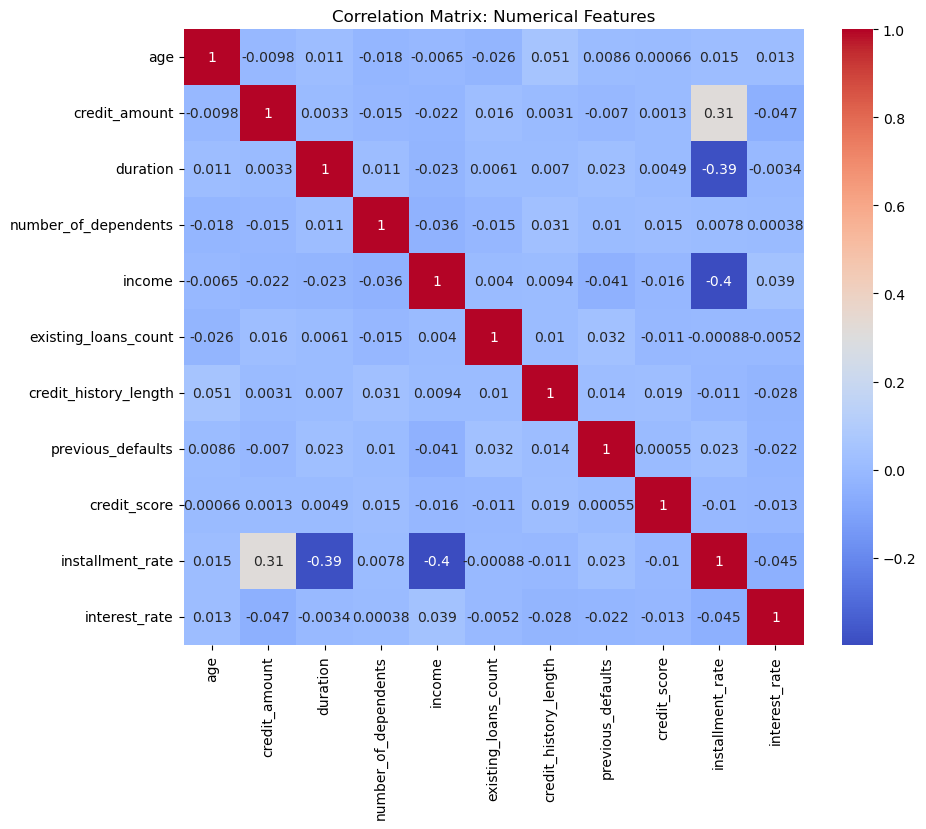

In [155]:
#this tells us which numbers (like age or income) move up or down together or shows weak or strong links
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only = True),annot= True, cmap="coolwarm")
plt.title("Correlation Matrix: Numerical Features")
plt.show()

## our observation is mostly numerical variables show very low correlation with each othe indicating low multicollinearity¶
## the positive correlation as seen in the matrix is between credit_amount and installment which is highlighted in white
## negative correlation is shoen in between income and duration i.e. (0.38)
basically this means higher income individuals tend to take shorter loan durations

In [157]:
# all charts

In [158]:
# Handle missing values
# Fill numerical columns with median, categorical columns with mode
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
    else:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)

C:\Users\vedan\AppData\Local\Temp\ipykernel_16232\968985108.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
C:\Users\vedan\AppData\Local\Temp\ipykernel_16232\968985108.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

In [159]:
df.isnull().sum()

age                      0
sex                      0
job                      0
saving_accounts          0
checking_account         0
credit_amount            0
duration                 0
purpose                  0
marital_status           0
education_level          0
number_of_dependents     0
income                   0
employment_status        0
existing_loans_count     0
credit_history_length    0
previous_defaults        0
credit_score             0
installment_rate         0
loan_type                0
interest_rate            0
collateral               0
default                  0
loan_eligibility         0
dtype: int64

In [160]:
# Droping the purpose column as it is same as loan_type
df.drop(columns=['purpose'], inplace=True)

In [161]:
#Contains leakage/derived info, drop column
df.drop(columns=['loan_eligibility'], inplace=True)

In [162]:
# Encode categorical variables using Label Encoding
label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [163]:
df

,age,sex,job,saving_accounts,checking_account,credit_amount,duration,marital_status,education_level,number_of_dependents,...,employment_status,existing_loans_count,credit_history_length,previous_defaults,credit_score,installment_rate,loan_type,interest_rate,collateral,default
0,56.0,0,2,0,1,46062.0,41.0,1,0,1.0,...,2,0.0,4.0,0.0,466.0,0.03,1,10.58,3,0
1,69.0,0,2,1,0,3463.0,39.0,1,2,1.0,...,0,1.0,7.0,0.0,734.0,0.00,0,5.84,0,0
2,46.0,1,3,1,1,27924.0,9.0,0,1,1.0,...,0,0.0,4.0,0.0,310.0,0.02,2,6.63,1,0
3,32.0,1,3,1,1,15003.0,70.0,1,0,0.0,...,3,0.0,15.0,0.0,682.0,0.02,3,16.43,1,0
4,60.0,1,1,0,0,3542.0,45.0,0,1,0.0,...,1,0.0,7.0,0.0,773.0,0.00,4,16.80,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,38.0,0,3,3,1,42315.0,49.0,1,1,1.0,...,0,1.0,22.0,0.0,573.0,0.01,0,12.53,2,0
2996,52.0,1,3,0,0,49193.0,52.0,0,0,0.0,...,0,2.0,12.0,0.0,817.0,0.01,0,5.13,1,0
2997,49.0,0,2,1,0,22751.0,34.0,2,2,1.0,...,0,1.0,26.0,0.0,666.0,0.01,3,5.45,2,0
2998,47.0,1,2,0,1,13207.0,56.0,2,1,1.0,...,0,2.0,14.0,0.0,445.0,0.00,3,16.19,1,0


In [164]:
# Scale numerical features with StandardScaler
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Save the scaler for later use
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [165]:
df

,age,sex,job,saving_accounts,checking_account,credit_amount,duration,marital_status,education_level,number_of_dependents,...,employment_status,existing_loans_count,credit_history_length,previous_defaults,credit_score,installment_rate,loan_type,interest_rate,collateral,default
0,0.853512,0,2,0,1,1.507322,0.129421,1,0,0.017669,...,2,-1.025559,-1.259305,-0.393363,-0.703355,0.323447,1,-0.462878,3,0
1,1.747866,0,2,1,0,-1.552588,0.021585,1,2,0.017669,...,0,-0.017143,-0.903982,-0.393363,1.052631,-0.535515,0,-1.582072,0,0
2,0.165547,1,3,1,1,0.204459,-1.595956,0,1,0.017669,...,0,-1.025559,-1.259305,-0.393363,-1.725497,0.037126,2,-1.395540,1,0
3,-0.797603,1,3,1,1,-0.723663,1.693045,1,0,-1.042494,...,3,-1.025559,0.043547,-0.393363,0.711917,0.037126,3,0.918406,1,0
4,1.128698,1,1,0,0,-1.546913,0.345094,0,1,-1.042494,...,1,-1.025559,-0.903982,-0.393363,1.308166,-0.535515,4,1.005769,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-0.384824,0,3,3,1,1.238173,0.560766,1,1,0.017669,...,0,-0.017143,0.872635,-0.393363,-0.002271,-0.249194,0,-0.002450,2,0
2996,0.578326,1,3,0,0,1.732223,0.722520,0,0,-1.042494,...,0,0.991273,-0.311776,-0.393363,1.596462,-0.249194,0,-1.749715,1,0
2997,0.371937,0,2,1,0,-0.167120,-0.248005,2,2,0.017669,...,0,-0.017143,1.346399,-0.393363,0.607082,-0.249194,3,-1.674158,2,0
2998,0.234344,1,2,0,1,-0.852671,0.938192,2,1,0.017669,...,0,0.991273,-0.074894,-0.393363,-0.840951,-0.535515,3,0.861738,1,0


In [166]:
# Set 'Default' as target variable
X = df.drop(columns=['default'])
y = df['default']

In [167]:
# Split data (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [168]:
print(f"Training set: {X_train.shape[0]} samples | Test set: {X_test.shape[0]} samples")

Training set: 2400 samples | Test set: 600 samples


In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
# Initialize models
log_reg = LogisticRegression(max_iter=2000, solver='liblinear', random_state=42)
dec_tree = DecisionTreeClassifier(random_state=42)
rand_forest = RandomForestClassifier(random_state=42, n_estimators=100)

# Train models
log_reg.fit(X_train, y_train)
dec_tree.fit(X_train, y_train)
rand_forest.fit(X_train, y_train)

print("Models trained successfully.")


Models trained successfully.


In [170]:
# Model predictions and probabilities
y_pred_logreg = log_reg.predict(X_test)
y_pred_tree = dec_tree.predict(X_test)
y_pred_rf = rand_forest.predict(X_test)

In [171]:
y_prob_logreg = log_reg.predict_proba(X_test)[:, 1]
y_prob_tree = dec_tree.predict_proba(X_test)[:, 1]
y_prob_rf = rand_forest.predict_proba(X_test)[:, 1]

In [172]:
# Evaluation function
def evaluate_model(name, y_true, y_pred, y_prob):
    print(f"\nModel: {name}")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print(f"ROC-AUC Score: {roc_auc_score(y_true, y_prob):.4f}")

In [173]:
# Evaluate models
evaluate_model("Logistic Regression", y_test, y_pred_logreg, y_prob_logreg)
evaluate_model("Decision Tree", y_test, y_pred_tree, y_prob_tree)
evaluate_model("Random Forest", y_test, y_pred_rf, y_prob_rf)


Model: Logistic Regression
Accuracy: 0.9333
Confusion Matrix:
[[537   6]
 [ 34  23]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       543
           1       0.79      0.40      0.53        57

    accuracy                           0.93       600
   macro avg       0.87      0.70      0.75       600
weighted avg       0.93      0.93      0.92       600

ROC-AUC Score: 0.9434

Model: Decision Tree
Accuracy: 0.9583
Confusion Matrix:
[[524  19]
 [  6  51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       543
           1       0.73      0.89      0.80        57

    accuracy                           0.96       600
   macro avg       0.86      0.93      0.89       600
weighted avg       0.96      0.96      0.96       600

ROC-AUC Score: 0.9299

Model: Random Forest
Accuracy: 0.9833
Confusion Matrix:
[[543   0]
 [ 10  47]]
Classifica

In [174]:
import numpy as np
import pandas as pd

# Assume ROC-AUC scores from previous evaluation: 
# You can replace these with actual values after running evaluation
roc_auc_scores = {
    'Logistic Regression': roc_auc_score(y_test, y_prob_logreg),
    'Decision Tree': roc_auc_score(y_test, y_prob_tree),
    'Random Forest': roc_auc_score(y_test, y_prob_rf)
}

In [175]:
# Select best model
best_model_name = max(roc_auc_scores, key=roc_auc_scores.get)
print(f"Best Model Based on ROC-AUC: {best_model_name}")

if best_model_name == 'Logistic Regression':
    best_model = log_reg
elif best_model_name == 'Decision Tree':
    best_model = dec_tree
else:
    best_model = rand_forest


#joblib.dump(best_model, 'best_credit_risk_model.pkl')
#print("Best model saved as 'best_credit_risk_model.pkl'")

Best Model Based on ROC-AUC: Random Forest


In [176]:
import joblib
import pandas as pd

# Assuming roc_auc_scores dictionary and trained models: log_reg, dec_tree, rand_forest exist from previous code

# Select best model based on ROC-AUC score
#best_model_name = max(roc_auc_scores, key=roc_auc_scores.get)
#print(f"Best Model Based on ROC-AUC: {best_model_name}")

#if best_model_name == 'Logistic Regression':
    #best_model = log_reg
#elif best_model_name == 'Decision Tree':
 #   best_model = dec_tree
#else:
 #   best_model = rand_forest

# Save the best model
joblib.dump(best_model, 'best_credit_risk_model.pkl')
print("Best model saved as 'best_credit_risk_model.pkl'")

sample_input_values = {
    'age': 45,
    'sex': 1,
    'job': 2,
    'saving_accounts': 0,
    'checking_account': 1,
    'credit_amount': 5000,
    'duration': 36,
    'marital_status': 1,
    'education_level': 2,
    'number_of_dependents': 1,
    'income': 35000,
    'employment_status': 1,
    'existing_loans_count': 0,
    'credit_history_length': 4,
    'previous_defaults': 0,
    'credit_score': 650,
    'installment_rate': 3,
    'loan_type': 1,
    'interest_rate': 5,
    'collateral': 1
}
# Ensure the sample input keys exactly match training feature columns and order
feature_columns = list(X_train.columns)

# Create a DataFrame for the sample input, ordered by feature columns
sample_df = pd.DataFrame([sample_input_values], columns=feature_columns)

# Scale numerical features in the sample input
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
sample_df[numerical_cols] = scaler.transform(sample_df[numerical_cols])

# Predict using the best model (make sure best_model and scaler are loaded/defined)
prediction = best_model.predict(sample_df)[0]

result = "Good Credit Risk" if prediction == 0 else "Bad Credit Risk"
print(f"Prediction for sample input: {result}")


Best model saved as 'best_credit_risk_model.pkl'
Prediction for sample input: Good Credit Risk
